In [185]:
from __future__ import division
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
import numpy as np
import pandas as pd
import math
import h5py

In [2]:
fontSize=16
#matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'font.family':'MathJax_SansSerif', 'font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'DejaVu Sans','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
plotStyles={"markersize":8,"markeredgewidth":1.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
barStyles={"width":0.65, "linewidth":0, "align":"center"}

/Users/turtle/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [16]:
df=pd.read_csv('TECAN_210810.csv',delimiter=',',index_col=0)  

In [17]:
df

,1,2,3,4,5,6,7,8,9,10,...,171,172,173,174,175,176,177,178,179,180
Cycle Nr.,,,,,,,,,,,,,,,,,,,,,
Time [s],0.0000,339.0000,678.0000,1017.0000,1356.1000,1695.1000,2034.1000,2373.1000,2712.1000,3051.1000,...,57637.7000,57976.7000,58315.7000,58654.7000,58993.7000,59332.7000,59671.7000,60010.7000,60349.7000,60688.7000
Temp. [C],36.4000,37.1000,37.2000,36.8000,37.1000,36.9000,36.9000,37.0000,37.2000,36.9000,...,36.9000,37.0000,37.1000,37.1000,37.3000,36.9000,37.0000,37.2000,37.0000,37.1000
A1,0.0905,0.0887,0.0890,0.0891,0.0893,0.0888,0.0902,0.0906,0.0913,0.0920,...,0.9775,0.9769,0.9755,0.9751,0.9746,0.9733,0.9724,0.9709,0.9708,0.9697
A2,0.0887,0.0887,0.0890,0.0890,0.0891,0.0885,0.0898,0.0902,0.0908,0.0915,...,0.9781,0.9768,0.9765,0.9747,0.9745,0.9738,0.9729,0.9728,0.9713,0.9722
A3,0.0918,0.0914,0.0917,0.0918,0.0921,0.0914,0.0927,0.0931,0.0938,0.0943,...,1.0016,0.9999,0.9987,0.9968,0.9955,0.9966,0.9938,0.9956,0.9941,0.9952
A4,0.0909,0.0905,0.0906,0.0906,0.0908,0.0901,0.0913,0.0916,0.0921,0.0924,...,0.9781,0.9758,0.9783,0.9752,0.9783,0.9795,0.9766,0.9763,0.9782,0.9741
A5,0.0892,0.0881,0.0884,0.0884,0.0885,0.0877,0.0889,0.0892,0.0895,0.0898,...,0.9804,0.9800,0.9796,0.9803,0.9806,0.9795,0.9810,0.9804,0.9800,0.9805
A6,0.0890,0.0882,0.0883,0.0885,0.0885,0.0879,0.0891,0.0894,0.0898,0.0900,...,0.9820,0.9817,0.9811,0.9793,0.9818,0.9811,0.9844,0.9828,0.9831,0.9852
B1,0.0901,0.0876,0.0879,0.0880,0.0895,0.0874,0.0885,0.0886,0.0892,0.0893,...,0.9480,0.9490,0.9511,0.9462,0.9499,0.9460,0.9490,0.9496,0.9475,0.9457


## check temperature

Text(0, 0.5, 'Temperature (C)')

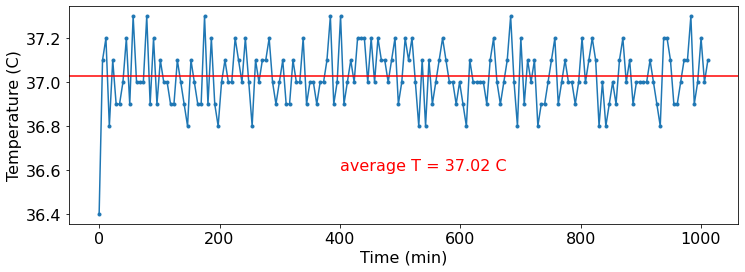

In [170]:
def f_constant(x,c):
    return c
xdata = df.to_numpy()[0]/60;
ydata = df.to_numpy()[1];
param, cov = curve_fit(f_constant, xdata[1:], ydata[1:])
av_T = str(param[0])[:5]
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(xdata, ydata, '.-')
plt.axhline(param[0],color='r')
plt.text(400, 36.6, 'average T = '+av_T+' C', color='red')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (C)')

## check empty sample

In [171]:
#idx = np.array([-11,-10,-8,-7,-6,-5,-4,-3,-2,-1]);
idx = np.arange(-11,0,1);

Text(0.5, 0, 'Time (min)')

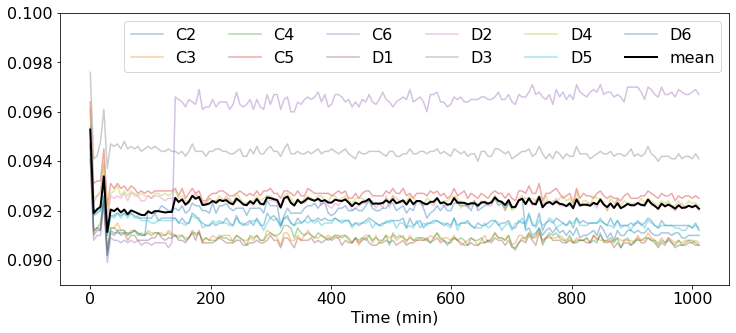

In [229]:
time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx]
labels = df.index[idx].to_list()

time = df.to_numpy()[0]/60
mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (12,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=0.4, label = labels[i])
plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='mean')
plt.ylim(0.089,0.1)
plt.legend(ncol=6)
plt.xlabel('Time (min)')

## check OD curve (linear space)

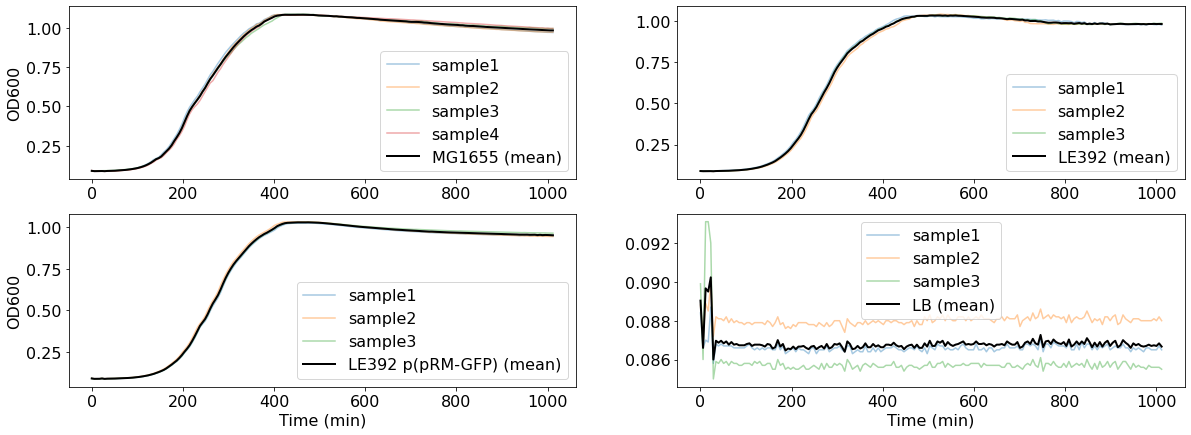

In [272]:
MG1655_idx = np.array([2,3,4,14]);
LE392_idx = np.array([5,6,7]);
LE392_gfp_idx = np.array([8,9,10]);
LB_idx = np.array([11,12,13]);

MG1655 = df.to_numpy()[MG1655_idx,:]; 
LE392 = df.to_numpy()[LE392_idx,:]; 
LE392_gfp = df.to_numpy()[LE392_gfp_idx,:]; 
LB = df.to_numpy()[LB_idx,:]; 

plt.rcParams["figure.figsize"] = (20,7)
subplot(2,2,1)
for i in range(0,len(MG1655[:,1])):
    plt.plot(time, MG1655[i],alpha=0.4, label = 'sample'+str(i+1))
plt.plot(time,np.mean(MG1655,axis=0),linewidth = 2, color='k',label='MG1655 (mean)')
plt.ylabel('OD600')
plt.legend()

subplot(2,2,2)
for i in range(0,len(LE392[:,1])):
    plt.plot(time, LE392[i],alpha=0.4, label = 'sample'+str(i+1))
plt.plot(time,np.mean(LE392,axis=0),linewidth = 2, color='k',label='LE392 (mean)')
plt.legend()

subplot(2,2,3)
for i in range(0,len(LE392_gfp[:,1])):
    plt.plot(time, LE392_gfp[i],alpha=0.4, label = 'sample'+str(i+1))
plt.plot(time,np.mean(LE392_gfp,axis=0),linewidth = 2, color='k',label='LE392 p(pRM-GFP) (mean)')
plt.ylabel('OD600')
plt.xlabel('Time (min)')
plt.legend()

subplot(2,2,4)
for i in range(0,len(LB[:,1])):
    plt.plot(time, LB[i],alpha=0.4, label = 'sample'+str(i+1))
plt.plot(time,np.mean(LB,axis=0), linewidth = 2, color='k',label='LB (mean)')
plt.xlabel('Time (min)')
plt.legend()

## check background substracted OD curve (log space)

$N(t) = N_0 2^{\frac{t}{T}}$

$\log_2 N(t) = \log_2 N_0 + \frac{t}{T}$

Therefore, in the exponential phase, $\log_2 N(t) $ is supposed to be linear with $t$. 

In [175]:
len(time)

180

<ipython-input-273-245aa69ae500>:6: RuntimeWarning: invalid value encountered in log2
  MG1655_c = np.log2(MG1655_c);
<ipython-input-273-245aa69ae500>:7: RuntimeWarning: invalid value encountered in log2
  LE392_c = np.log2(LE392_c);
<ipython-input-273-245aa69ae500>:8: RuntimeWarning: invalid value encountered in log2
  LE392_gfp_c = np.log2(LE392_gfp_c);


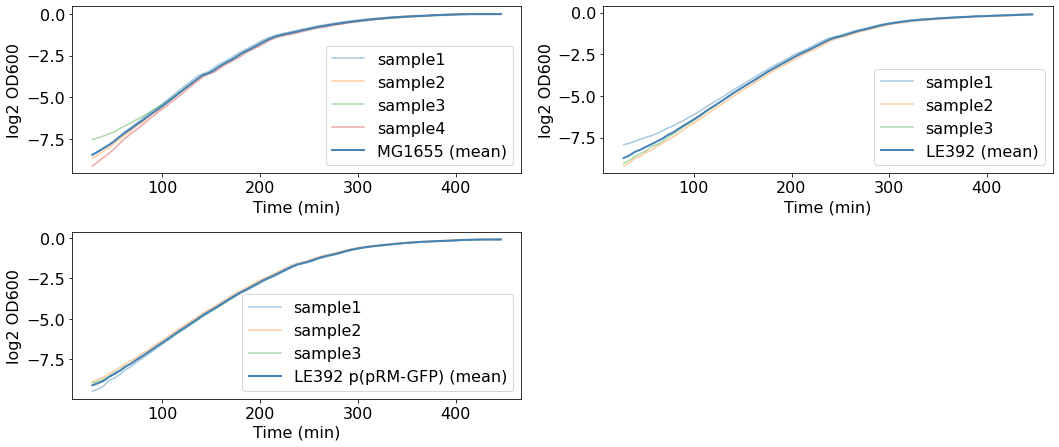

In [273]:
MG1655_c = MG1655 - np.mean(LB, axis=0);
LE392_c = LE392 - np.mean(LB, axis=0);
LE392_gfp_c = LE392_gfp - np.mean(LB, axis=0);


MG1655_c = np.log2(MG1655_c);
LE392_c = np.log2(LE392_c);
LE392_gfp_c = np.log2(LE392_gfp_c);

max_idx = 0;
for i in (MG1655_c, LE392_c, LE392_gfp_c):
    for j in range(0,len(i[:,0])):
        tmp = np.where(np.isnan(i[j,:])==True)[0]
        if len(tmp) > 0:
            if tmp[-1] > max_idx:
                max_idx = tmp[-1];
MG1655_c = MG1655_c[:,max_idx+1:80];
LE392_c = LE392_c[:,max_idx+1:80];
LE392_gfp_c = LE392_gfp_c[:,max_idx+1:80];
time_c = time[max_idx+1:80];

plt.rcParams["figure.figsize"] = (15,6.5)
subplot(2,2,1)
for i in range(0,len(MG1655_c[:,1])):
    plt.plot(time_c, MG1655_c[i],alpha=0.4, label = 'sample'+str(i+1))
plt.plot(time_c,np.mean(MG1655_c,axis=0), '-',linewidth = 2, color='steelblue',label='MG1655 (mean)')
plt.xlabel('Time (min)')
plt.ylabel('log2 OD600')
plt.legend()

subplot(2,2,2)
for i in range(0,len(LE392_c[:,1])):
    plt.plot(time_c, LE392_c[i],alpha=0.4, label = 'sample'+str(i+1))
plt.plot(time_c,np.mean(LE392_c,axis=0), '-',linewidth = 2, color='steelblue',label='LE392 (mean)')
plt.ylabel('log2 OD600')
plt.xlabel('Time (min)')
plt.legend()

subplot(2,2,3)
for i in range(0,len(LE392_gfp_c[:,1])):
    plt.plot(time_c, LE392_gfp_c[i],alpha=0.4, label = 'sample'+str(i+1))
plt.plot(time_c,np.mean(LE392_gfp_c,axis=0), '-',linewidth = 2, color='steelblue',label='LE392 p(pRM-GFP) (mean)')
plt.ylabel('log2 OD600')
plt.xlabel('Time (min)')
plt.legend()

tight_layout()

## check background substracted OD curve (log space, with SD)

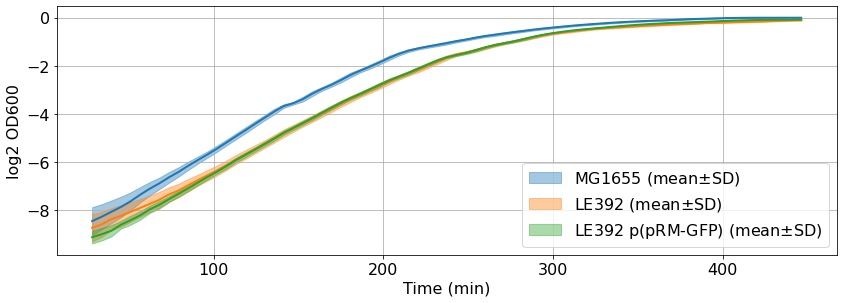

In [274]:
plt.rcParams["figure.figsize"] = (12,4.5)

labels = ['MG1655 (mean$\pm$SD)', 'LE392 (mean$\pm$SD)', 'LE392 p(pRM-GFP) (mean$\pm$SD)'];
colors = ['tab:blue','tab:orange','tab:green'];

j = 0;
for i in (MG1655_c, LE392_c, LE392_gfp_c):
    ydata = np.mean(i,axis=0);
    yerr = np.std(i,axis=0);
    plt.fill_between(time_c, ydata-yerr, ydata+yerr, alpha=0.4,label=labels[j], color=colors[j]);
    plt.plot(time_c, ydata, linewidth=2, color=colors[j]);
    j = j+1;
plt.ylabel('log2 OD600')
plt.xlabel('Time (min)')
plt.legend()
plt.grid(True)
tight_layout()

## determine the starting point of linear portion

For each time point, fit the successive 12 points, and calcualte R square. 

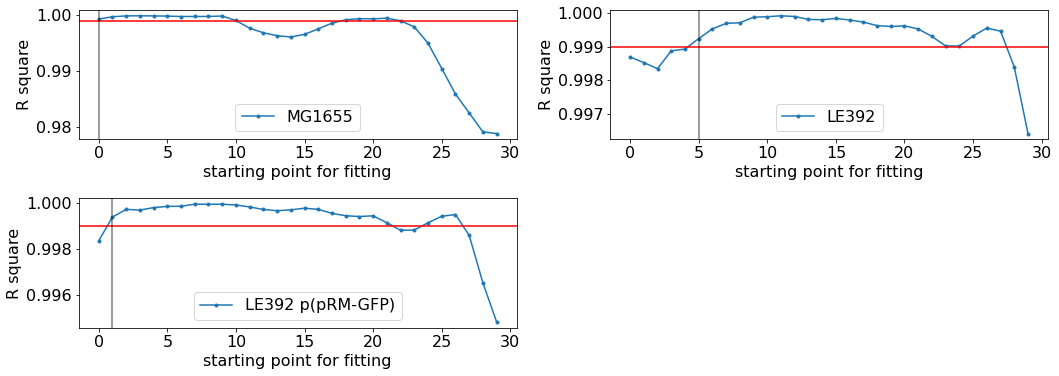

In [271]:
R_square_thresh = 0.999; 
starting_idx = np.arange(0,30,1);
starting_idx_selected = np.array([]); 

#################################################
plt.rcParams["figure.figsize"] = (15,5.5)
labels = ['MG1655', 'LE392', 'LE392 p(pRM-GFP)'];
k = 0;
for i in (MG1655_c, LE392_c, LE392_gfp_c):
    R_square = np.array([]);
    for j in starting_idx:
        xdata = time_c[j:j+12];
        ydata = np.mean(i,axis=0)[j:j+12];
        slope, intercept, r_value, _, _ = linregress(xdata, ydata);
        R_square = np.append(R_square, r_value);
    starting_idx_selected_tmp = np.where(R_square>R_square_thresh)[0][0]; 
    starting_idx_selected = np.append(starting_idx_selected, starting_idx_selected_tmp);
    subplot(2,2,k+1)
    plt.plot(starting_idx, R_square, '.-',label = labels[k]);
    plt.ylabel('R square')
    plt.xlabel('starting point for fitting')
    plt.axhline(R_square_thresh,color='r')
    plt.axvline(starting_idx_selected_tmp,color='k',alpha = 0.5)
    plt.legend()
    k = k+1;
plt.tight_layout()

## determine number of points for fitting

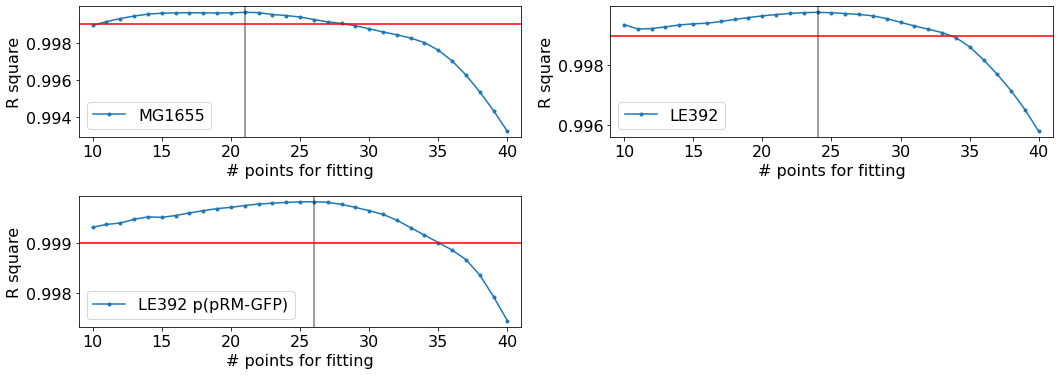

In [270]:
fitting_points = np.arange(10,41,1);
fitting_points_selected = np.array([]);

#################################################
plt.rcParams["figure.figsize"] = (15,5.5)
k = 0;

labels = ['MG1655', 'LE392', 'LE392 p(pRM-GFP)'];
for i in (MG1655_c, LE392_c, LE392_gfp_c):
    j_0 = int(starting_idx_selected[k]);
    R_square = np.array([]);
    for j in fitting_points:
        xdata = time_c[j_0:j_0+j];
        ydata = np.mean(i,axis=0)[j_0:j_0+j];
        slope, intercept, r_value, _, _ = linregress(xdata, ydata);
        R_square = np.append(R_square, r_value);
    tmp2 = np.argmax(R_square);
    fitting_points_selected = np.append(fitting_points_selected, fitting_points[tmp2]); 
    subplot(2,2,k+1)
    plt.plot(fitting_points, R_square, '.-',label = labels[k]);
    plt.xlim(9,41)
    plt.ylabel('R square')
    plt.xlabel('# points for fitting')
    plt.axvline(fitting_points[tmp2],color='k',alpha = 0.5)
    plt.axhline(R_square_thresh,color='r')
    plt.legend()
    k = k+1;
plt.tight_layout()

## fitting

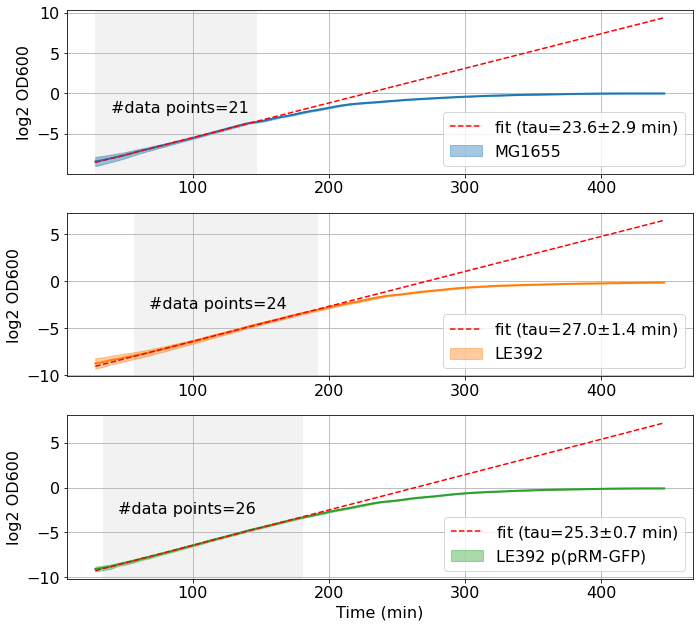

In [269]:
plt.rcParams["figure.figsize"] = (10,9)
k = 0;

labels = ['MG1655', 'LE392', 'LE392 p(pRM-GFP)'];
colors = ['tab:blue','tab:orange','tab:green'];
for i in (MG1655_c, LE392_c, LE392_gfp_c):
    j_0 = int(starting_idx_selected[k]);
    j = int(fitting_points_selected[k]);
    xdata = time_c[j_0:j_0+j];
    #ydata = np.mean(i,axis=0)[j_0:j_0+j];
    slope_array = np.array([]);
    inter_array = np.array([]); 
    generation_time_tmp = np.array([]);
    for sample_idx in range(0,len(i[:,1])):
        ydata = i[sample_idx,j_0:j_0+j];
        slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
        generation_time_tmp = np.append(generation_time_tmp, 1/slope); 
        slope_array = np.append(slope_array, slope)
        inter_array = np.append(inter_array, intercept)
    generation_time = str(np.mean(generation_time_tmp))[:4];
    generation_time_err = str(np.std(generation_time_tmp))[:3];
    subplot(3,1,k+1)
    y = np.mean(i,axis=0); 
    yerr = np.std(i,axis=0);
    plt.fill_between(time_c, y-yerr, y+yerr, alpha=0.4,label=labels[k], color=colors[k]);
    plt.plot(time_c, y,linewidth=2, color=colors[k]);
    plt.plot(time_c, np.mean(slope_array)*time_c+np.mean(inter_array), \
             'r--',label='fit (tau='+generation_time+'$\pm$'+generation_time_err+' min)')
    plt.axvspan(time_c[j_0], time_c[j_0+j], facecolor='black', alpha=0.05)
    plt.text(time_c[int(j_0+0.1*j)],np.mean(y),'#data points='+str(j))
    plt.legend()
    plt.grid(True);plt.ylabel('log2 OD600')
    k = k+1; 
plt.xlabel('Time (min)'); 
plt.tight_layout()